### Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Data Collection and Analysis

In [9]:
customers_data = pd.read_csv("Mall_Customers.csv")
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# No of rows and columns in dataset
customers_data.shape

(200, 5)

In [14]:
# Understanding the dataset in more details(e.g. datatypes of each column, Non-Null count in each col).
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
#Checking the missing values in each column of dataset
customers_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Taking Annual Income and Spending Score Column

In [20]:
#Remove irrelevant information/features from the dataset
cus_data = customers_data.iloc[:, [3,4]].values;
# cus_data.head()

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Chosing the correct number of clusters.

### WCSS - Within Clusters Sum of Squares

In [33]:
#finding wcss value for different number of clusters
#what is init = 'k-means++'(Best initiation step for KMeans)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cus_data)
    
    wcss.append(kmeans.inertia_)
print(wcss)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30259.657207285458, 25011.839349156595, 21850.16528258562, 19672.07284901432]


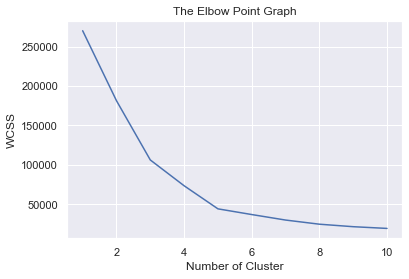

In [34]:
# Plot an elbow graph to find which cluster has minimum wcss value.
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

### Optimum number of clusters = 5

### Training the KMeans clustering model.

In [72]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

#return a label for each data points based on their cluster number.
labels_data = kmeans.fit_predict(cus_data)
print(labels_data)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### Visualizing all the clusters.

### 5 Clusters - 0, 1, 2, 3, 4

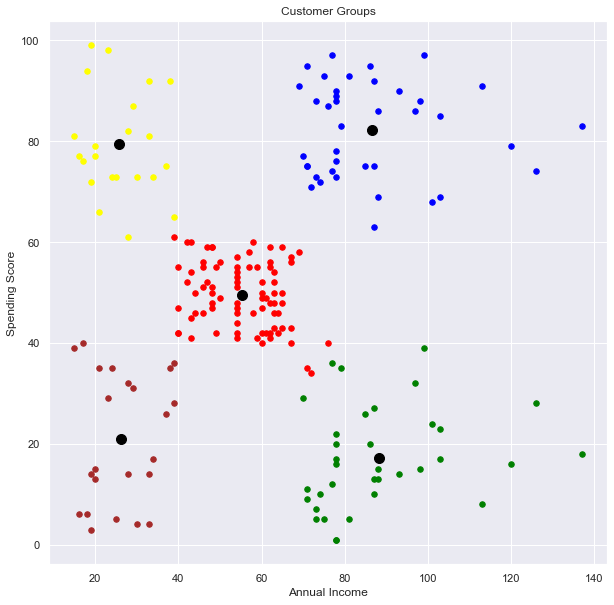

In [77]:
#Plotting all the clusters and their centroids.
plt.figure(figsize = (10, 10))

plt.scatter(cus_data[labels_data == 0 , 0], cus_data[labels_data == 0 , 1], s = 30, c = 'green', label = 'Cluster 1')
plt.scatter(cus_data[labels_data == 1 , 0], cus_data[labels_data == 1 , 1], s = 30, c = 'red', label = 'Cluster 2')
plt.scatter(cus_data[labels_data == 2 , 0], cus_data[labels_data == 2 , 1], s = 30, c = 'blue', label = 'Cluster 3')
plt.scatter(cus_data[labels_data == 3 , 0], cus_data[labels_data == 3 , 1], s = 30, c = 'yellow', label = 'Cluster 4')
plt.scatter(cus_data[labels_data == 4 , 0], cus_data[labels_data == 4 , 1], s = 30, c = 'brown', label = 'Cluster 5')

#Plotting the centroids.
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()